In [224]:
source('./data_processing.R')

In [225]:
my_colors <- c("D" = 'black', 'I' = 'grey60', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

# sgRNAcs2

In [229]:
input_dir = './GiRAFR_outputs/Replogle_NatureBiotechnology/sample1/'
output_dir = './figures_results/Replogle_NatureBiotechnology/sample1'

## All UMI profile

[1] "Number of mutant UMI"
[1] "Processed cell number: 7558"
[1] "Wildtype UMI: 100594"
[1] "Mutant UMI: 540615"


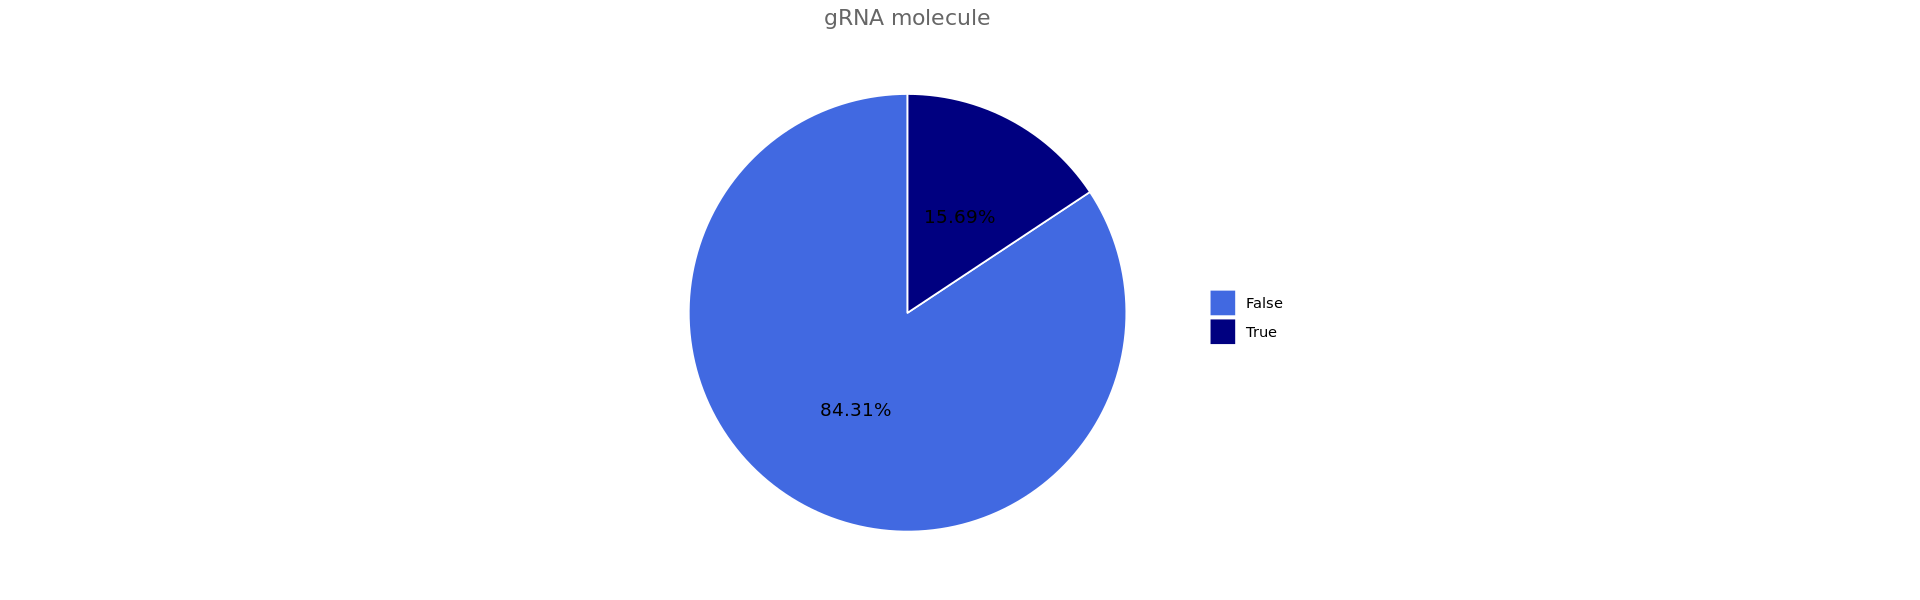

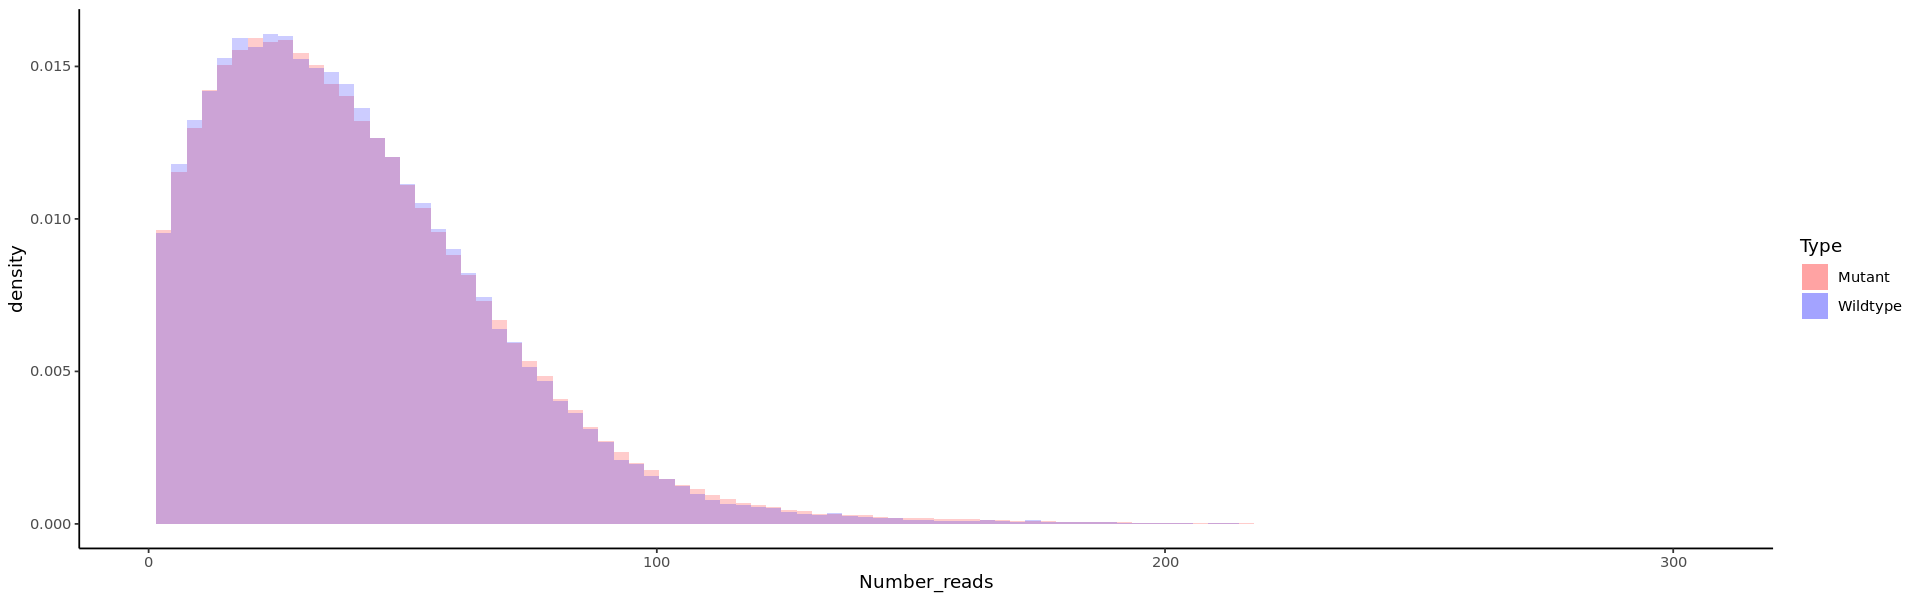

In [230]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)

Remove  Insertion and deletions at position -1, -2, 0  =>  
TSO:29  
TSO:28  
gRNA:1  

In [231]:
tmp <- gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False' 
                            & !grepl('TSO',gRNA_UMI_variant$Mutation)),]
index <- which(gRNA_UMI_variant$Type == 'False' & !grepl('TSO',gRNA_UMI_variant$Mutation))
index <- index[!grepl('gRNA:0', tmp$Mutation)]
tmp <- tmp[!grepl('gRNA:0', tmp$Mutation),]
nrow(tmp) # Real Mutant UMIs
nrow(gRNA_UMI_variant) - nrow(tmp) # wildtype UMIs

gRNA_UMI_variant$Type[index] <- 'False'
gRNA_UMI_variant$Type[-index] <- 'True'

[1] 47594

[1] 593615

False 
7.422541

True 
92.57746

[1] "Number of mutant UMI"
[1] "Processed cell number: 7558"
[1] "Wildtype UMI: 593615"
[1] "Mutant UMI: 47594"


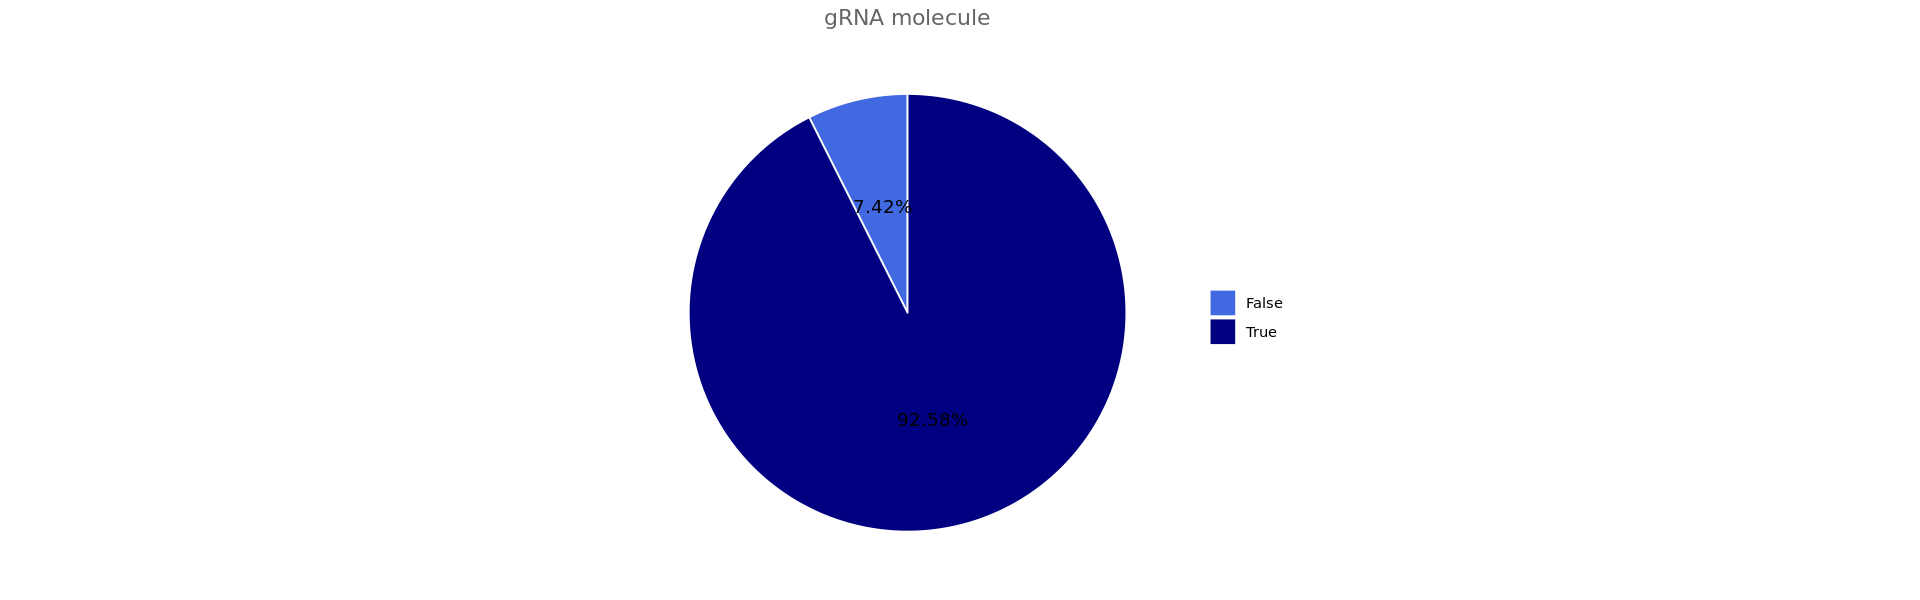

png 
  2

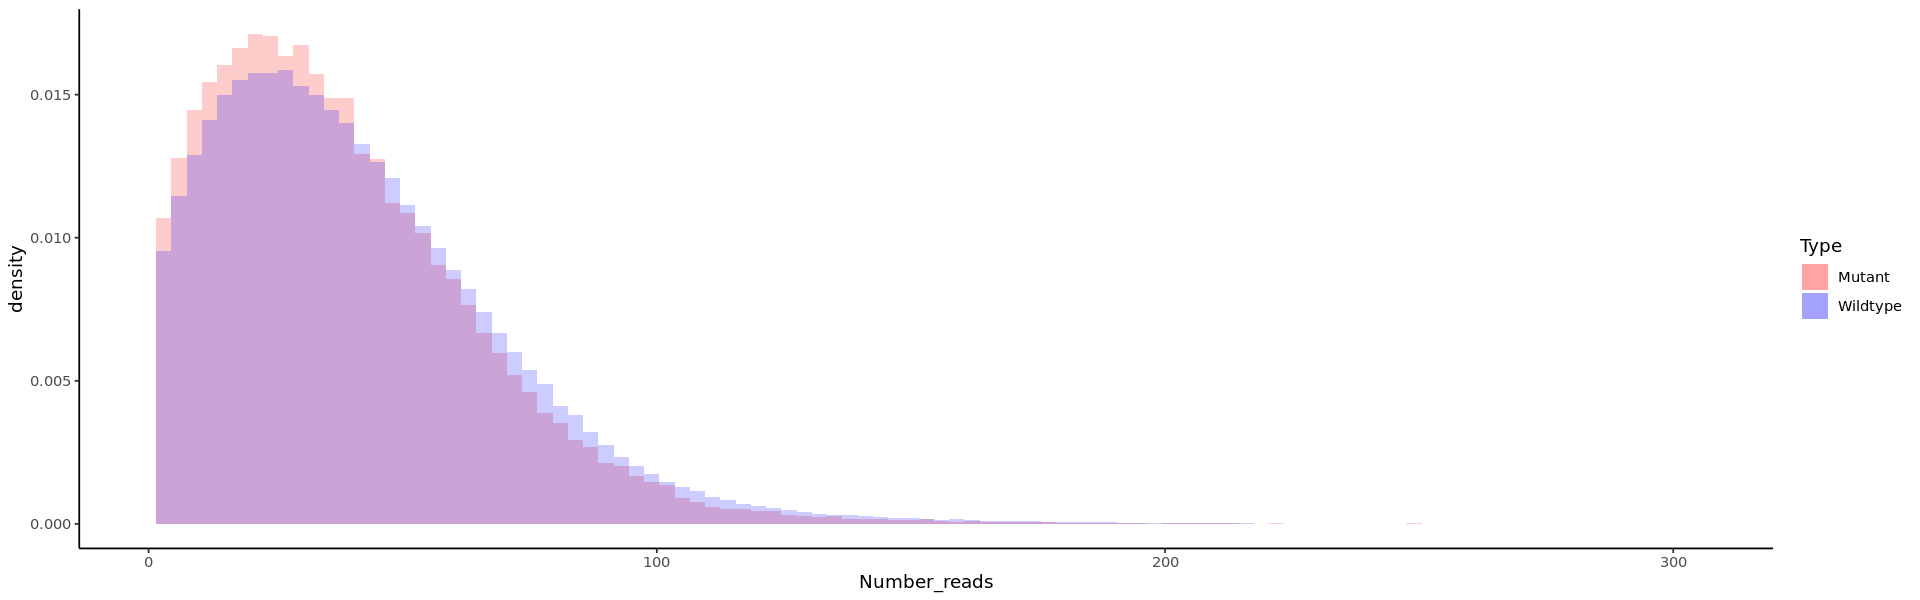

In [232]:
Freq = table(gRNA_UMI_variant$Type)
Freq[1] / (Freq[1] + Freq[2]) * 100
Freq[2] / (Freq[1] + Freq[2]) * 100

print('Number of mutant UMI')
print(paste0('Processed cell number: ' ,length(unique(gRNA_UMI_variant$CB))))
print(paste0('Wildtype UMI: ', Freq[2]))
print(paste0('Mutant UMI: ', Freq[1]))
#table(gRNA_UMI_variant$Type)

Freq.df = as.data.frame(table(gRNA_UMI_variant$Type))
colnames(Freq.df) <- c('Type','Number')

value = Freq.df$Number/sum(Freq.df$Number)

pie = ggplot(Freq.df, aes(x="", y=Number, fill=Type)) + geom_bar(stat="identity", width=1, color = 'white')
pie = pie + coord_polar("y", start=0) + geom_text(aes(label = paste0(round(value*100, digit =2), "%")), 
                                              position = position_stack(vjust = 0.5))
# Remove labels and add title
pie = pie + labs(x = NULL, y = NULL, fill = NULL, title = "gRNA molecule")
# Add color scale (hex colors)
pie = pie + scale_fill_manual(values=c("royalblue", "navy")) 
# Tidy up the theme
pie = pie + theme_classic() + theme(axis.line = element_blank(),
      axis.text = element_blank(),
      axis.ticks = element_blank(),
      plot.title = element_text(hjust = 0.5, color = "#666666"))
print(pie)
p  <- ggplot(gRNA_UMI_variant, aes(x = Number_reads, fill = Type)) +
geom_histogram(data = gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False'),],
               aes(x= Number_reads, y = ..density.. ), alpha = 0.2,binwidth = 3)+
geom_histogram(data = gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'True'),],
               aes(x= Number_reads, y = ..density..), alpha = 0.2,binwidth = 3)+theme_classic()+
scale_fill_manual(name="Type", values=c("red","blue"),labels=c("Mutant","Wildtype"))
print(p)
save_pdf <- paste0(output_dir,'.UMI_MT.pdf')
pdf(save_pdf, height = 8, width = 8)
print(pie)
print(p)
dev.off()


### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(3) D(5)    G I(1) I(2)    T 
  31    5    9    7    9    1    5   76    9    3 
[1] "MT mutation type"

 D  I  S 
26 85 44 
[1] "MT mutation structure"

gRNA Rest  TSO 
  39   33   83 


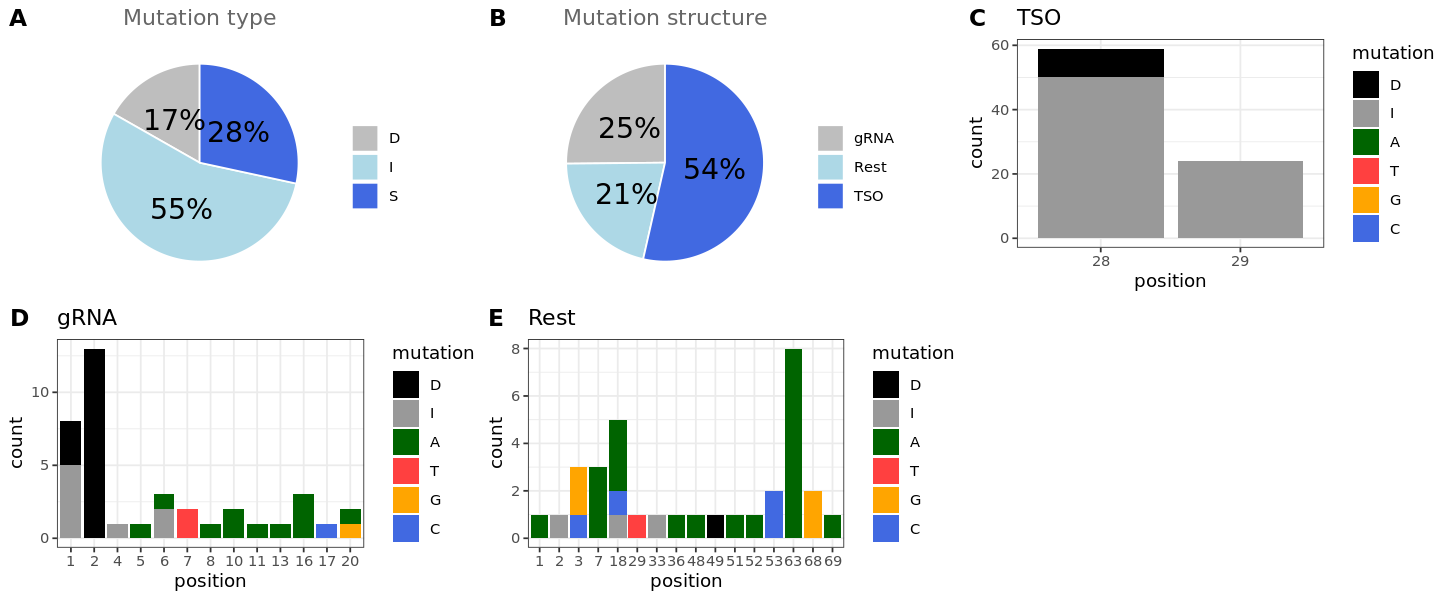

In [97]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [30]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.409   2.000   3.000 

Warning message:
“Removed 18 rows containing non-finite values (stat_count).”


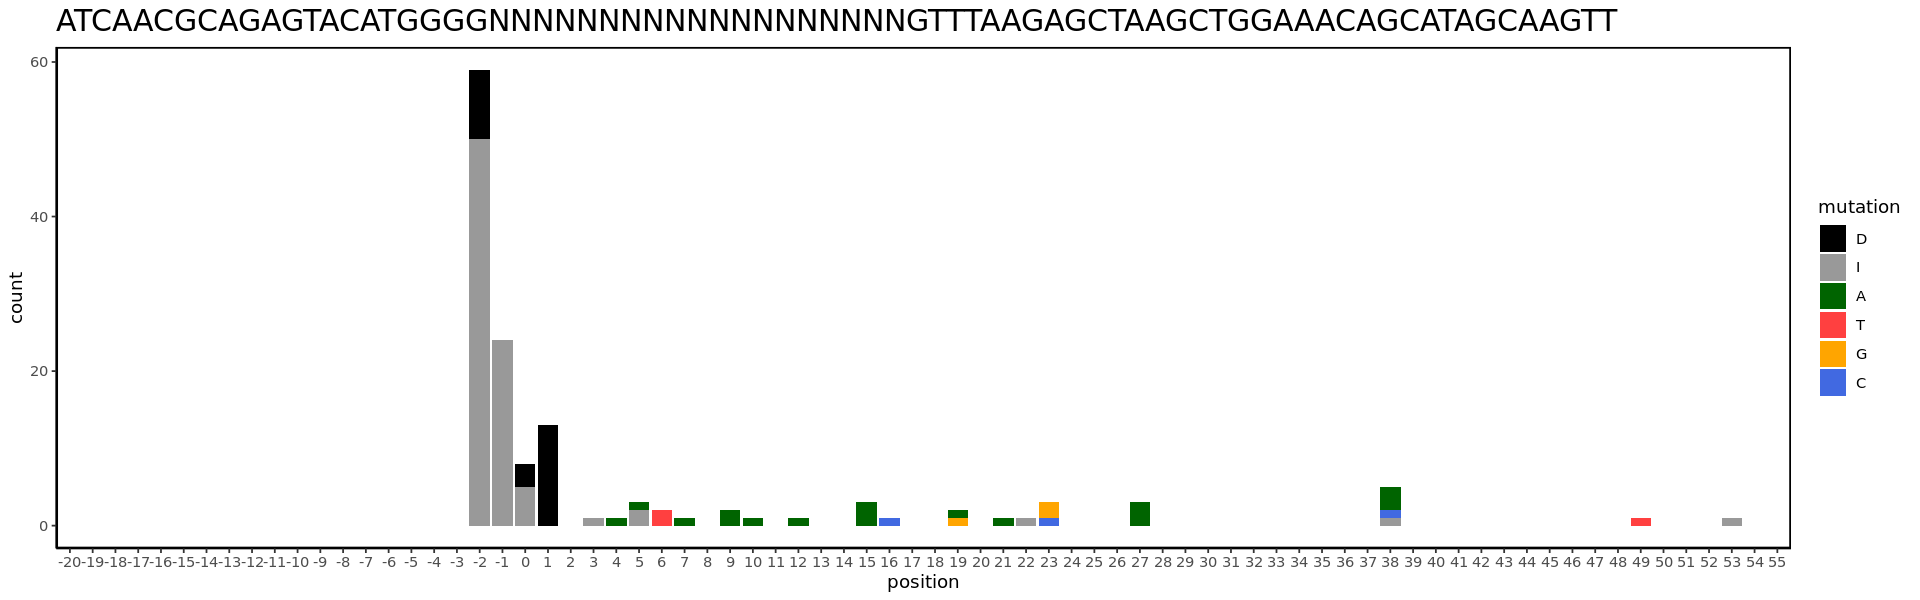

In [98]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))


options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
#dev.off()

## correct TSO

Remove Insertion and Delection next to GGGG

Warning message:
“Removed 18 rows containing non-finite values (stat_count).”


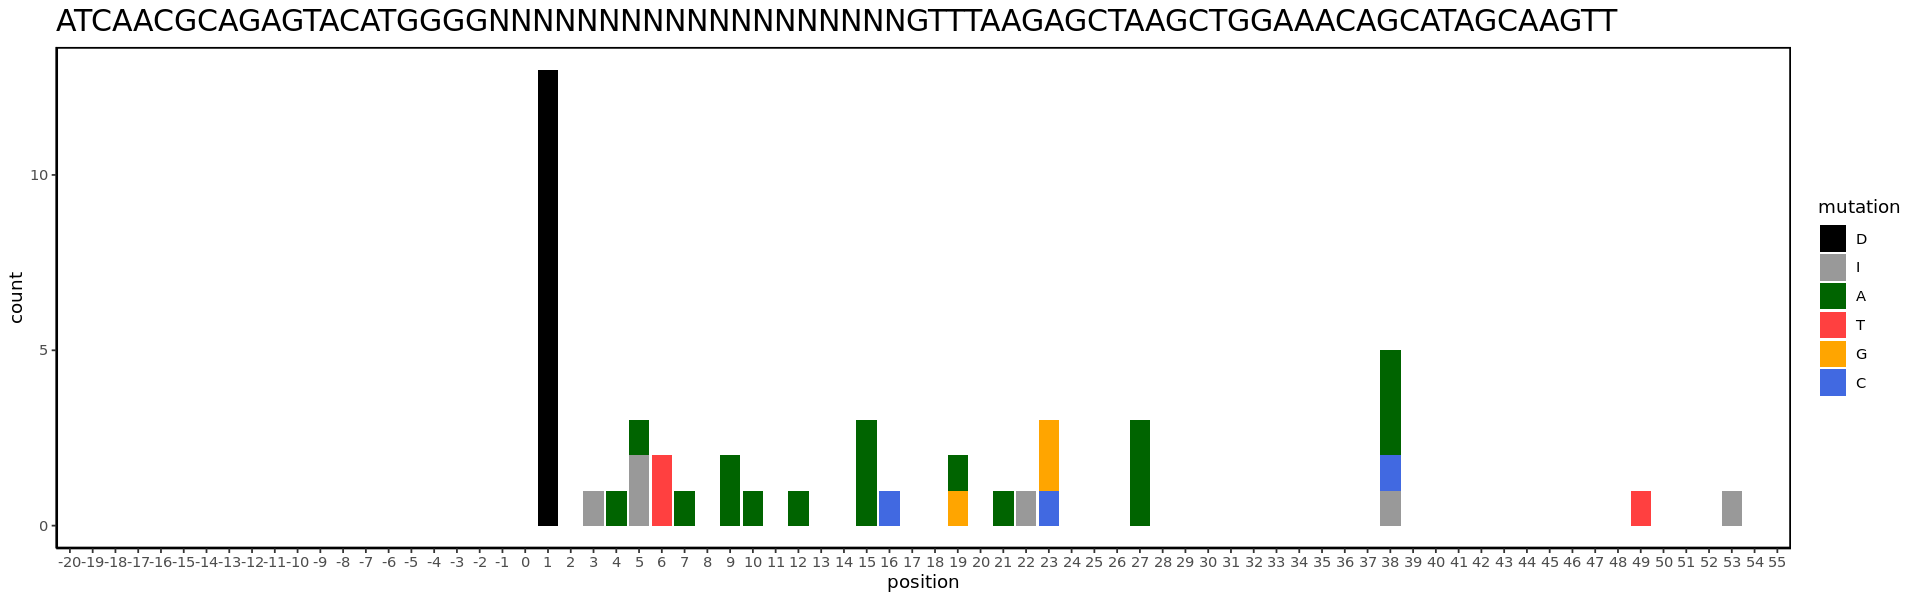

In [105]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted_TSO.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20

MT2 <- MT2[-which(MT2$position %in% c(-1, -2,0) & MT2$mutation2 %in% c('I','D')),]

MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))


#options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
#dev.off()

In [74]:
MT2[which(MT2$position == 1),] # all true, verfied manually, beginning of gRNA easly to have deletion when complementary with GGG

,gene name,structure,structure length,position,mutation,variant number,MT_type,mutation2
,<chr>,<chr>,<int>,<fct>,<chr>,<chr>,<chr>,<fct>
4,EIF2B4_gRNA1_gene,gRNA,21,1,D(3),EIF2B4_gRNA1_gene_variant_2,D,D
19,SEC61A1_gRNA1_gene,gRNA,21,1,D(3),SEC61A1_gRNA1_gene_variant_2,D,D
34,TMED2_gRNA1_gene,gRNA,21,1,D(2),TMED2_gRNA1_gene_variant_2,D,D
43,UFL1_gRNA1_gene,gRNA,21,1,D(2),UFL1_gRNA1_gene_variant_3,D,D
48,EIF2B4_gRNA1_gene,gRNA,21,1,D(3),EIF2B4_gRNA1_gene_variant_75,D,D
52,UFM1_gRNA1_gene,gRNA,21,1,D(2),UFM1_gRNA1_gene_variant_5,D,D
55,DDOST_gRNA1_gene,gRNA,21,1,D(2),DDOST_gRNA1_gene_variant_1,D,D
58,EIF2B2_gRNA1_gene,gRNA,22,1,D(2),EIF2B2_gRNA1_gene_variant_2,D,D
63,DDRGK1_gRNA1_gene,gRNA,21,1,D(2),DDRGK1_gRNA1_gene_variant_2,D,D


Rows: 8272 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'cb'. You can override using the `.groups` argument.


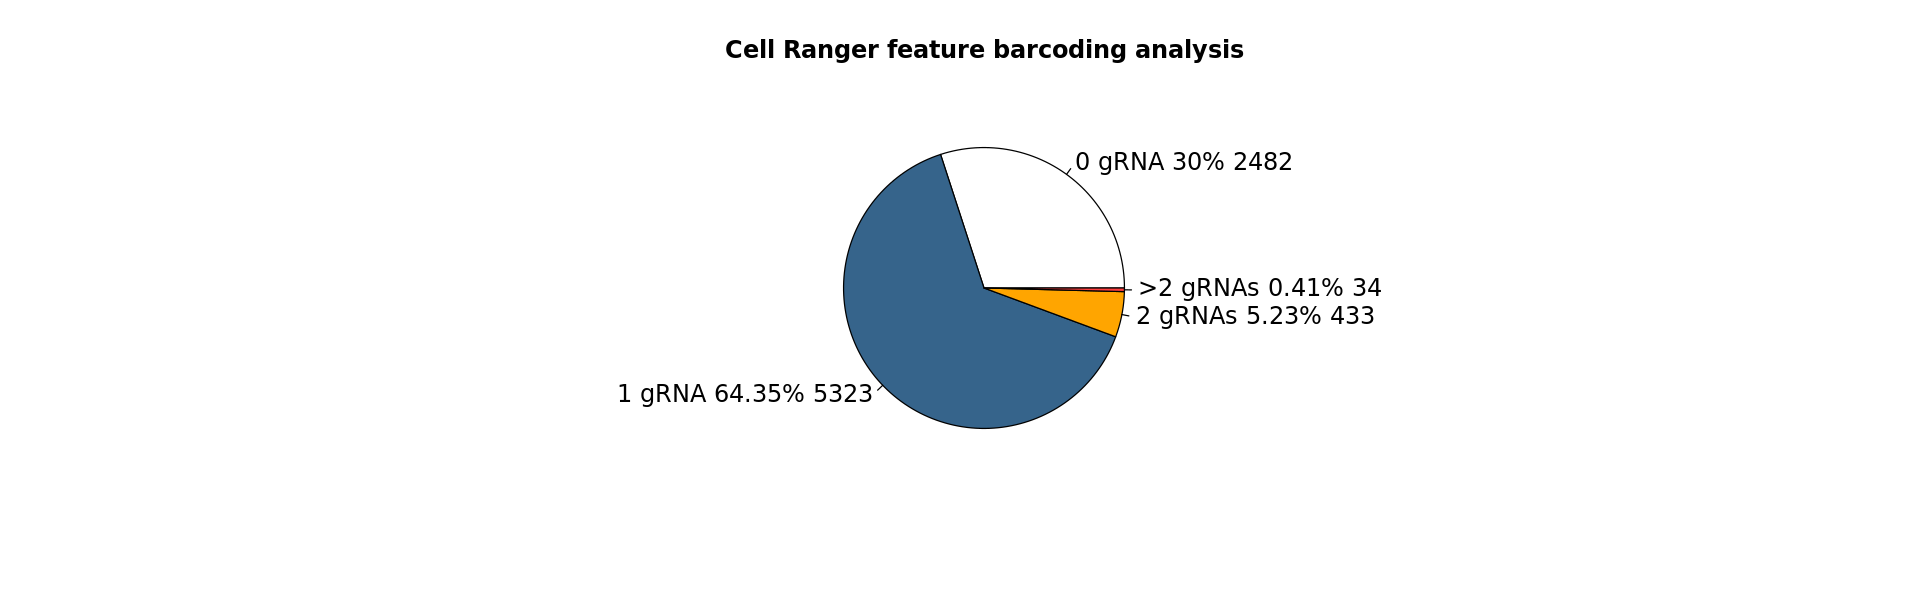

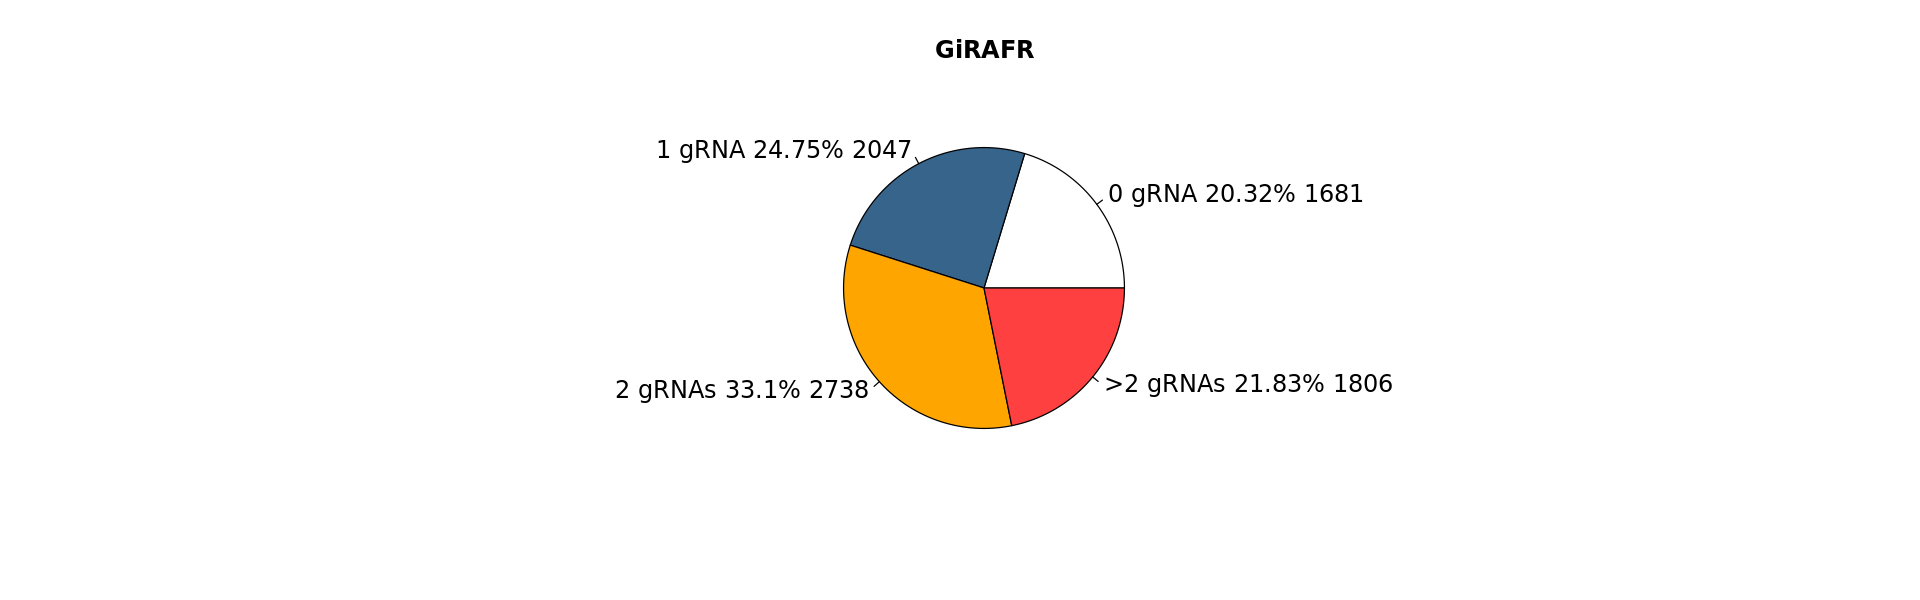

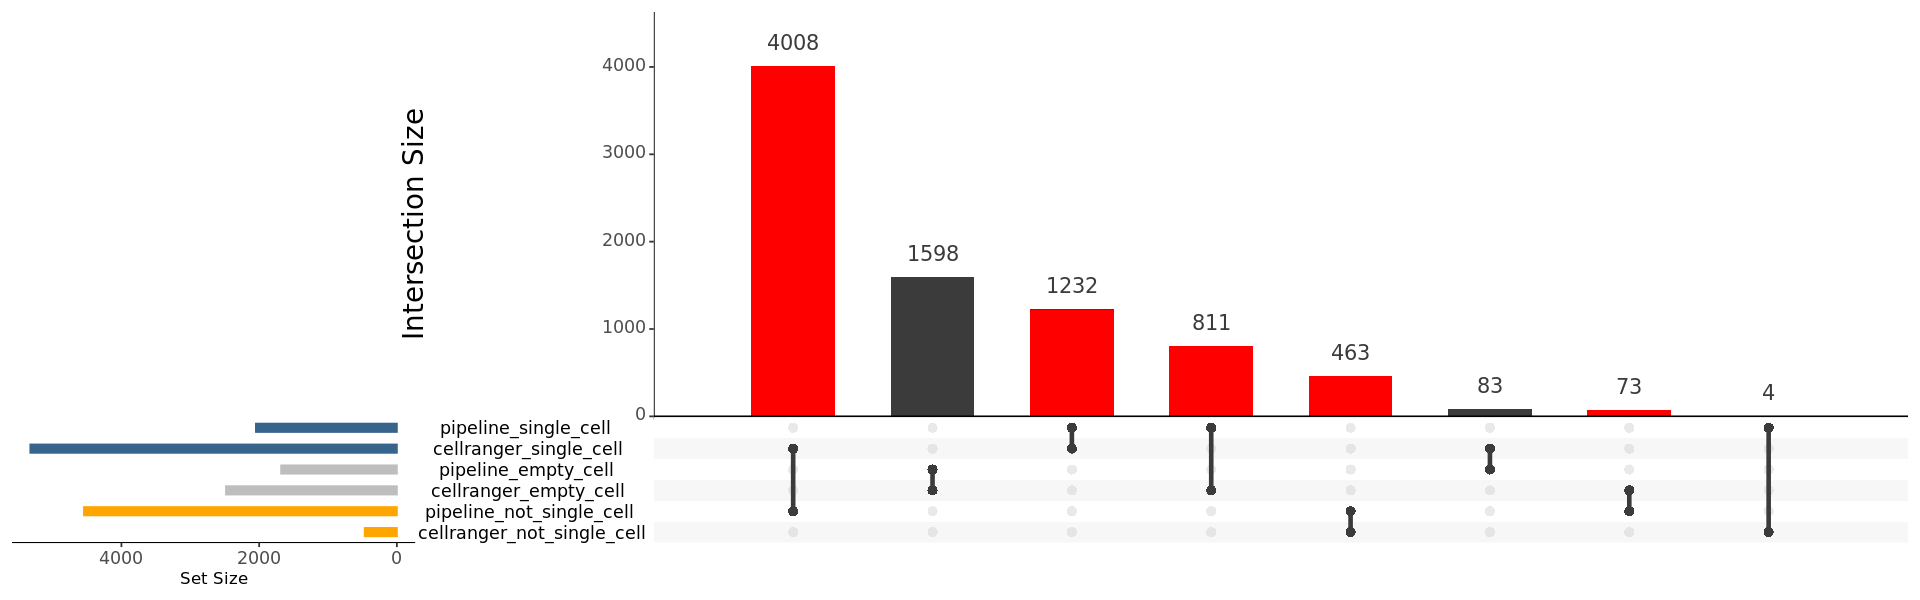

In [9]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Direct_perturb_seq/feature_barcoding_analysis/sgRNAcs2/outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Direct_perturb_seq/feature_barcoding_analysis/sgRNAcs2/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"

compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)


# sgRNAcs1

In [233]:
input_dir = './GiRAFR_outputs/Replogle_NatureBiotechnology/sample2/'
output_dir = './figures_results/Replogle_NatureBiotechnology/sample2'

## All UMI profile

[1] "Number of mutant UMI"
[1] "Processed cell number: 8674"
[1] "Wildtype UMI: 817252"
[1] "Mutant UMI: 4709011"


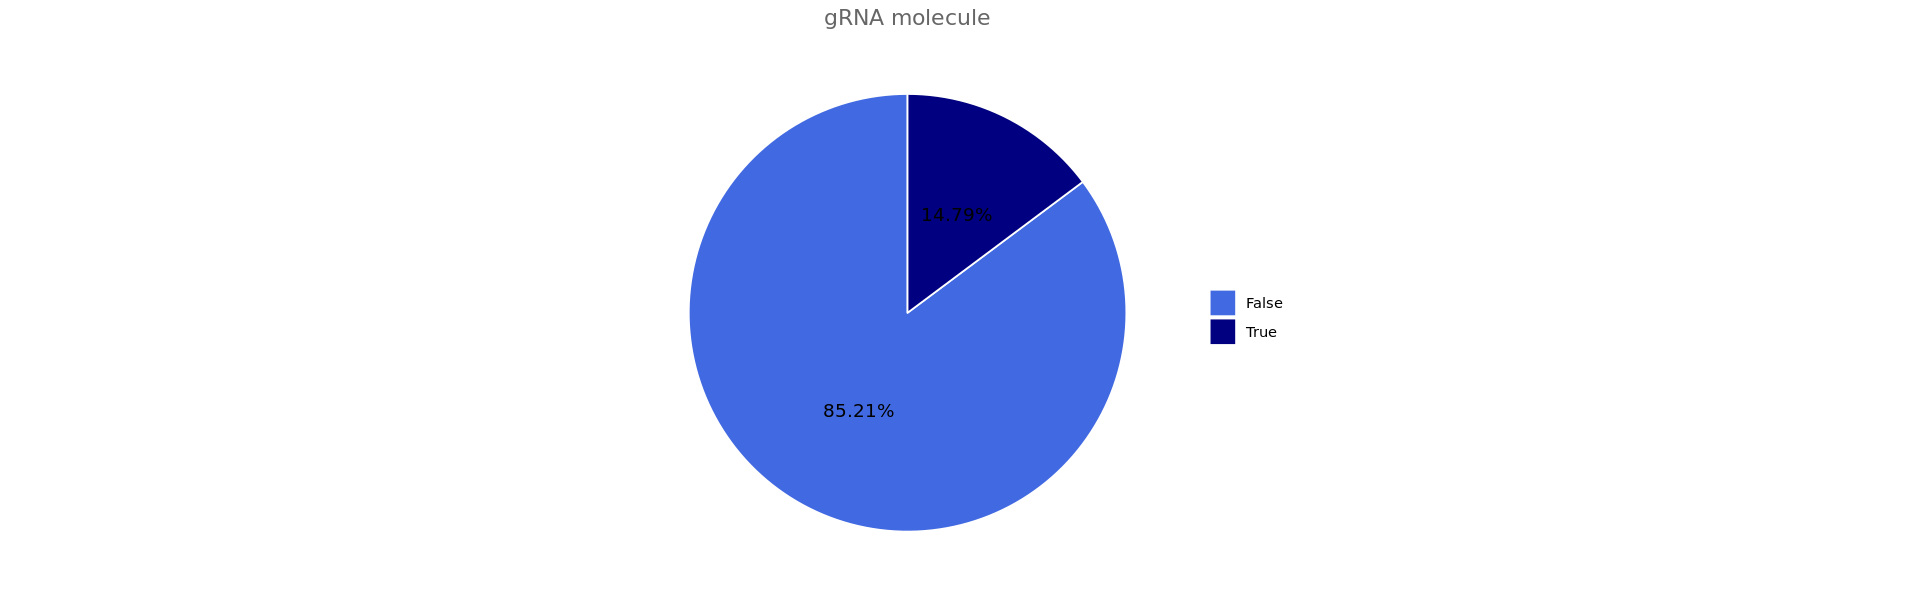

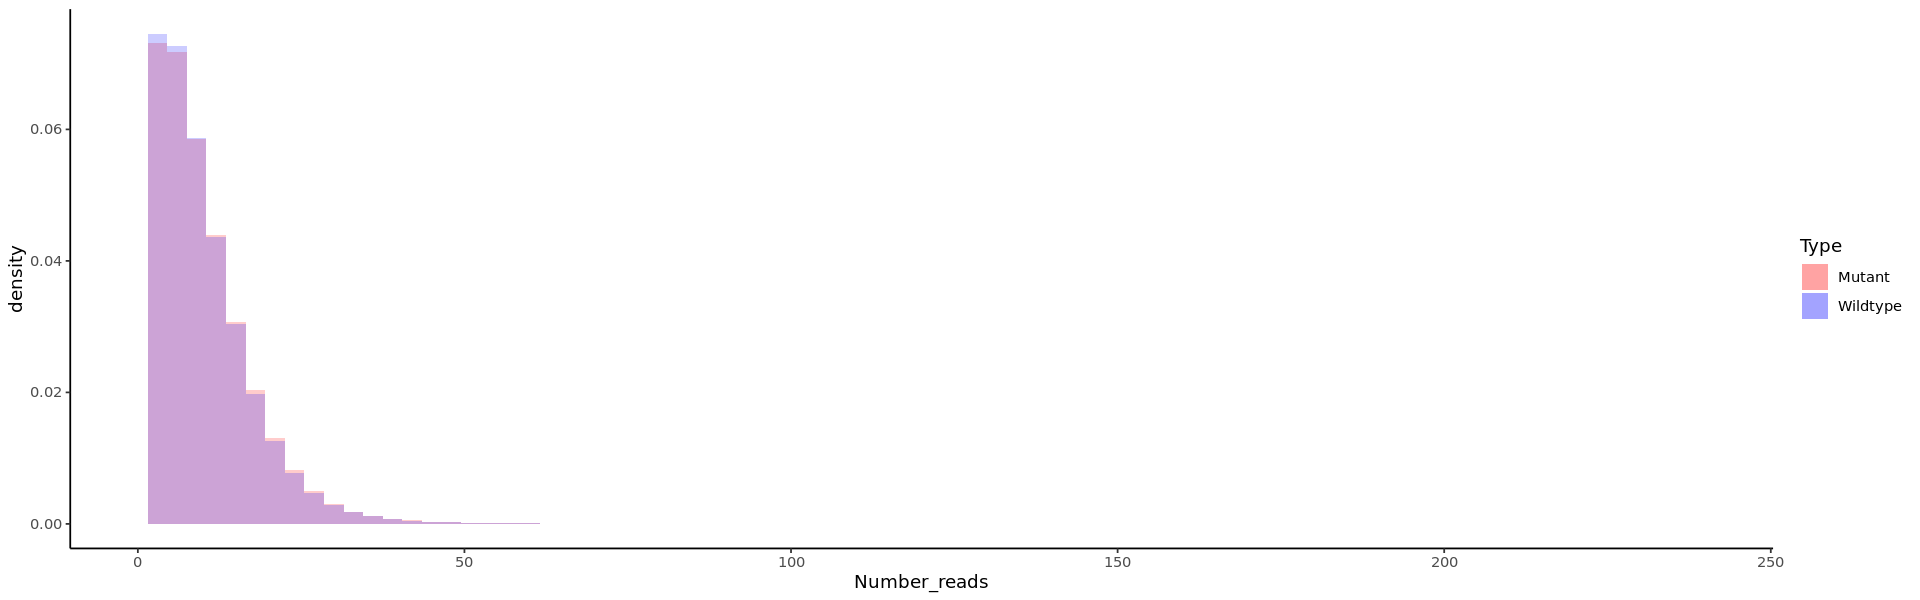

In [234]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)

In [235]:
tmp <- gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False' 
                            & !grepl('TSO',gRNA_UMI_variant$Mutation)),]
index <- which(gRNA_UMI_variant$Type == 'False' & !grepl('TSO',gRNA_UMI_variant$Mutation))
index <- index[!grepl('gRNA:0', tmp$Mutation)]
tmp <- tmp[!grepl('gRNA:0', tmp$Mutation),]
nrow(tmp) # Real Mutant UMIs
nrow(gRNA_UMI_variant) - nrow(tmp) # wildtype UMIs

gRNA_UMI_variant$Type[index] <- 'False'
gRNA_UMI_variant$Type[-index] <- 'True'

[1] 520040

[1] 5006223

False 
9.410338

True 
90.58966

[1] "Number of mutant UMI"
[1] "Processed cell number: 8674"
[1] "Wildtype UMI: 5006223"
[1] "Mutant UMI: 520040"


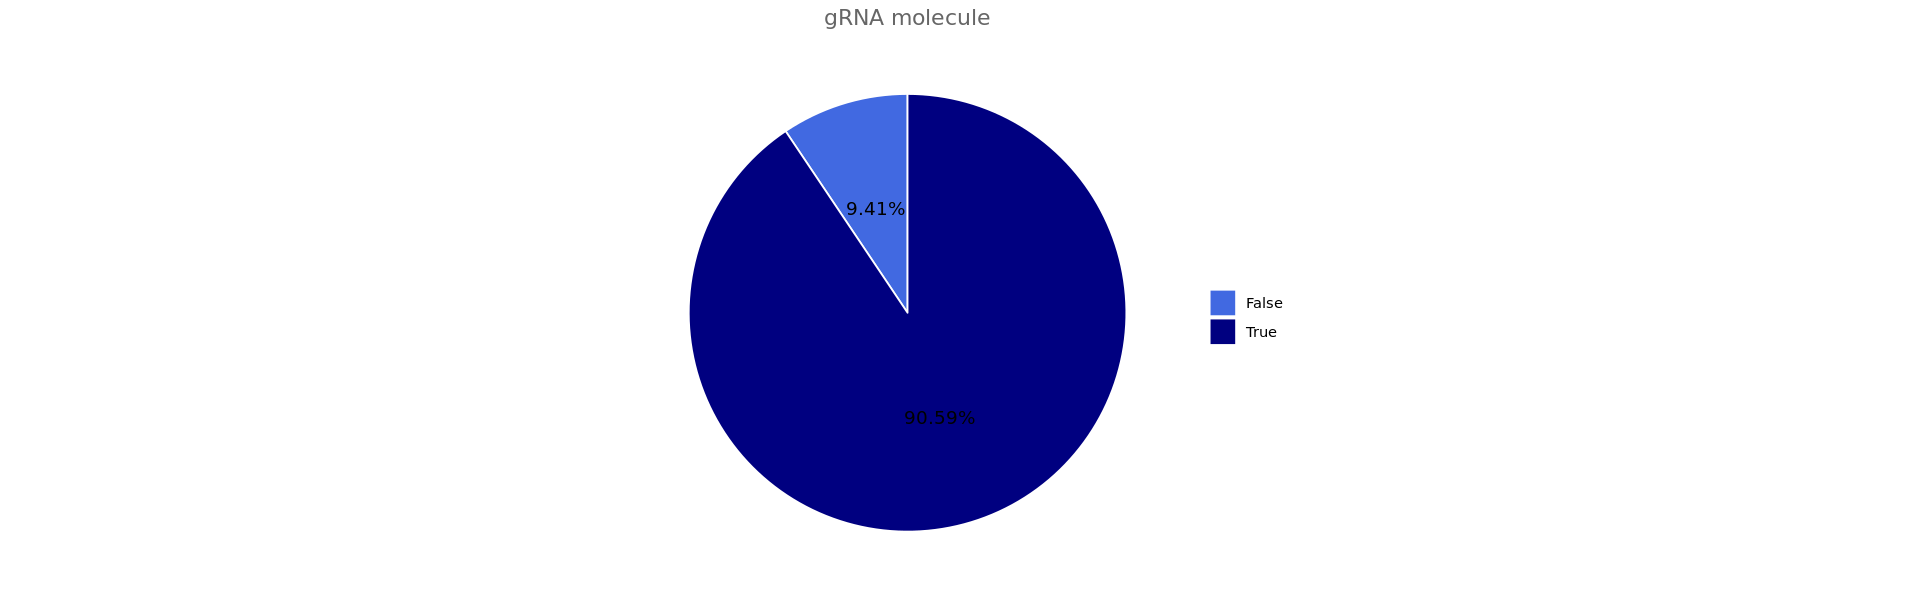

png 
  2

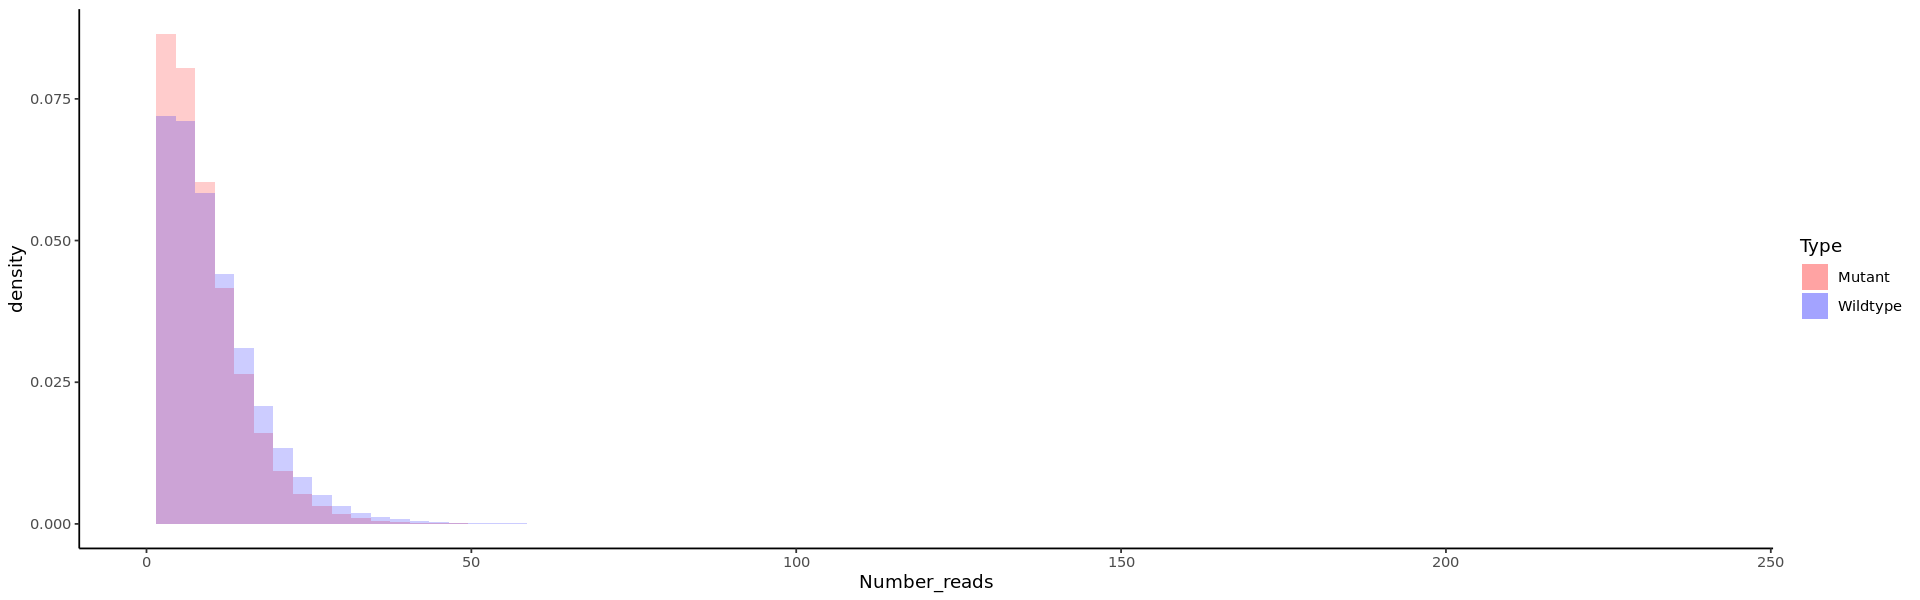

In [236]:
Freq = table(gRNA_UMI_variant$Type)
Freq[1] / (Freq[1] + Freq[2]) * 100
Freq[2] / (Freq[1] + Freq[2]) * 100

print('Number of mutant UMI')
print(paste0('Processed cell number: ' ,length(unique(gRNA_UMI_variant$CB))))
print(paste0('Wildtype UMI: ', Freq[2]))
print(paste0('Mutant UMI: ', Freq[1]))
#table(gRNA_UMI_variant$Type)

Freq.df = as.data.frame(table(gRNA_UMI_variant$Type))
colnames(Freq.df) <- c('Type','Number')

value = Freq.df$Number/sum(Freq.df$Number)

pie = ggplot(Freq.df, aes(x="", y=Number, fill=Type)) + geom_bar(stat="identity", width=1, color = 'white')
pie = pie + coord_polar("y", start=0) + geom_text(aes(label = paste0(round(value*100, digit =2), "%")), 
                                              position = position_stack(vjust = 0.5))
# Remove labels and add title
pie = pie + labs(x = NULL, y = NULL, fill = NULL, title = "gRNA molecule")
# Add color scale (hex colors)
pie = pie + scale_fill_manual(values=c("royalblue", "navy")) 
# Tidy up the theme
pie = pie + theme_classic() + theme(axis.line = element_blank(),
      axis.text = element_blank(),
      axis.ticks = element_blank(),
      plot.title = element_text(hjust = 0.5, color = "#666666"))
print(pie)
p  <- ggplot(gRNA_UMI_variant, aes(x = Number_reads, fill = Type)) +
geom_histogram(data = gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False'),],
               aes(x= Number_reads, y = ..density.. ), alpha = 0.2,binwidth = 3)+
geom_histogram(data = gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'True'),],
               aes(x= Number_reads, y = ..density..), alpha = 0.2,binwidth = 3)+theme_classic()+
scale_fill_manual(name="Type", values=c("red","blue"),labels=c("Mutant","Wildtype"))
print(p)
save_pdf <- paste0(output_dir,'.UMI_MT.pdf')
pdf(save_pdf, height = 8, width = 8)
print(pie)
print(p)
dev.off()


### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(3) D(4) D(5)    G I(1) I(2)    T 
  23    5   12   14    9    3    1    2   70   27    7 
[1] "MT mutation type"

 D  I  S 
39 97 37 
[1] "MT mutation structure"

gRNA Rest  TSO 
  58   26   89 


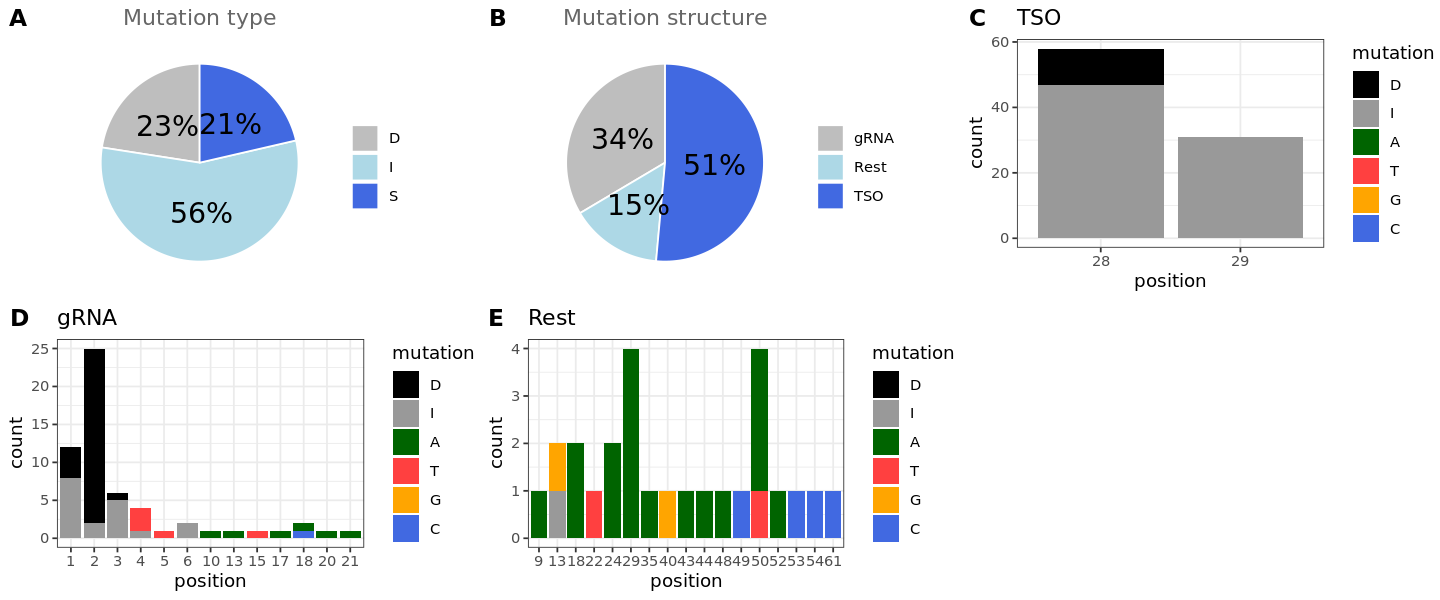

In [107]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [34]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.272   2.000   2.000 

Warning message:
“Removed 13 rows containing non-finite values (stat_count).”


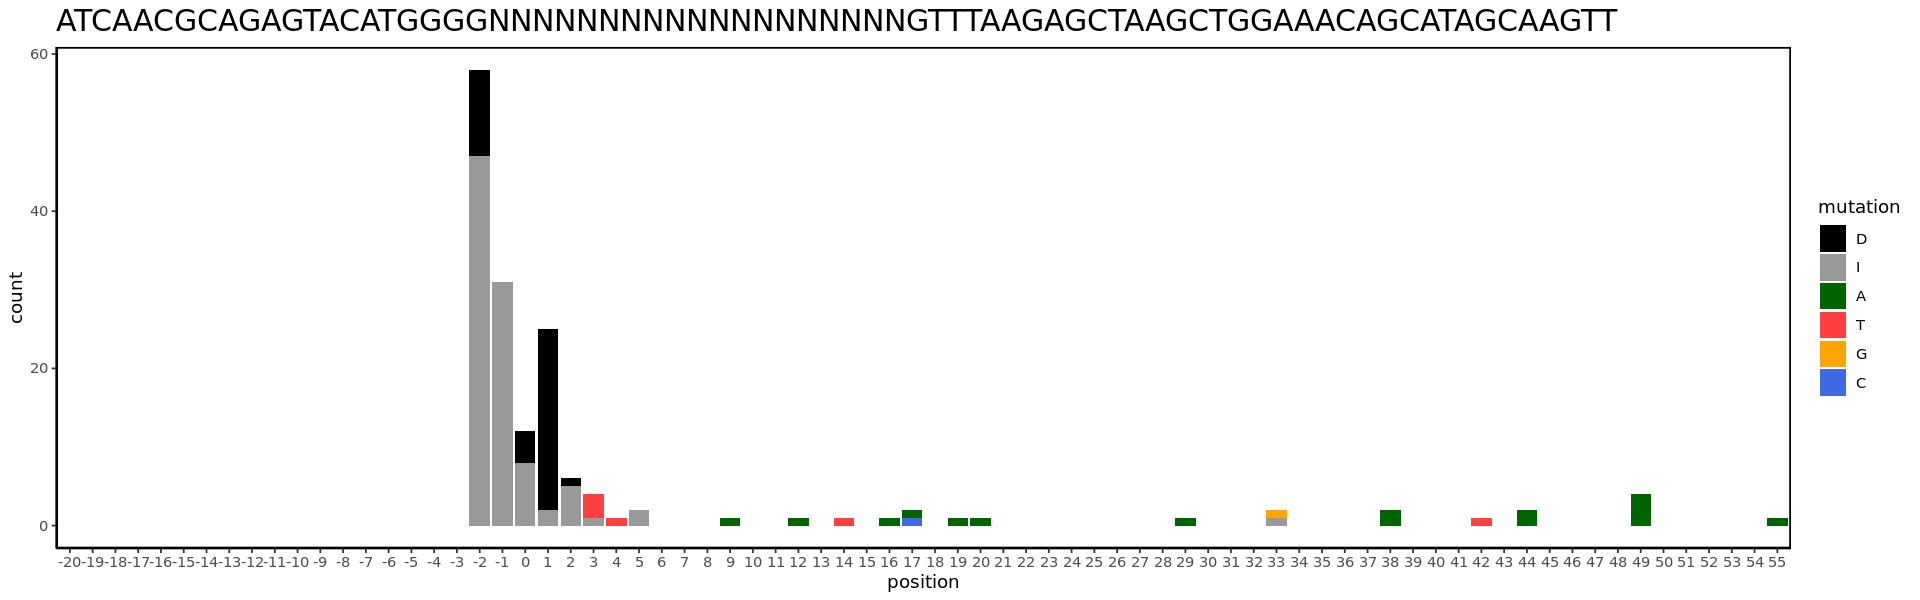

In [108]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
#dev.off()

In [110]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted_TSO.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

MT2 <- MT2[-which(MT2$position %in% c(-1, -2,0) & MT2$mutation2 %in% c('I','D')),]
options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
#dev.off()

Warning message:
“Removed 13 rows containing non-finite values (stat_count).”


png 
  2

Rows: 8725 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'cb'. You can override using the `.groups` argument.


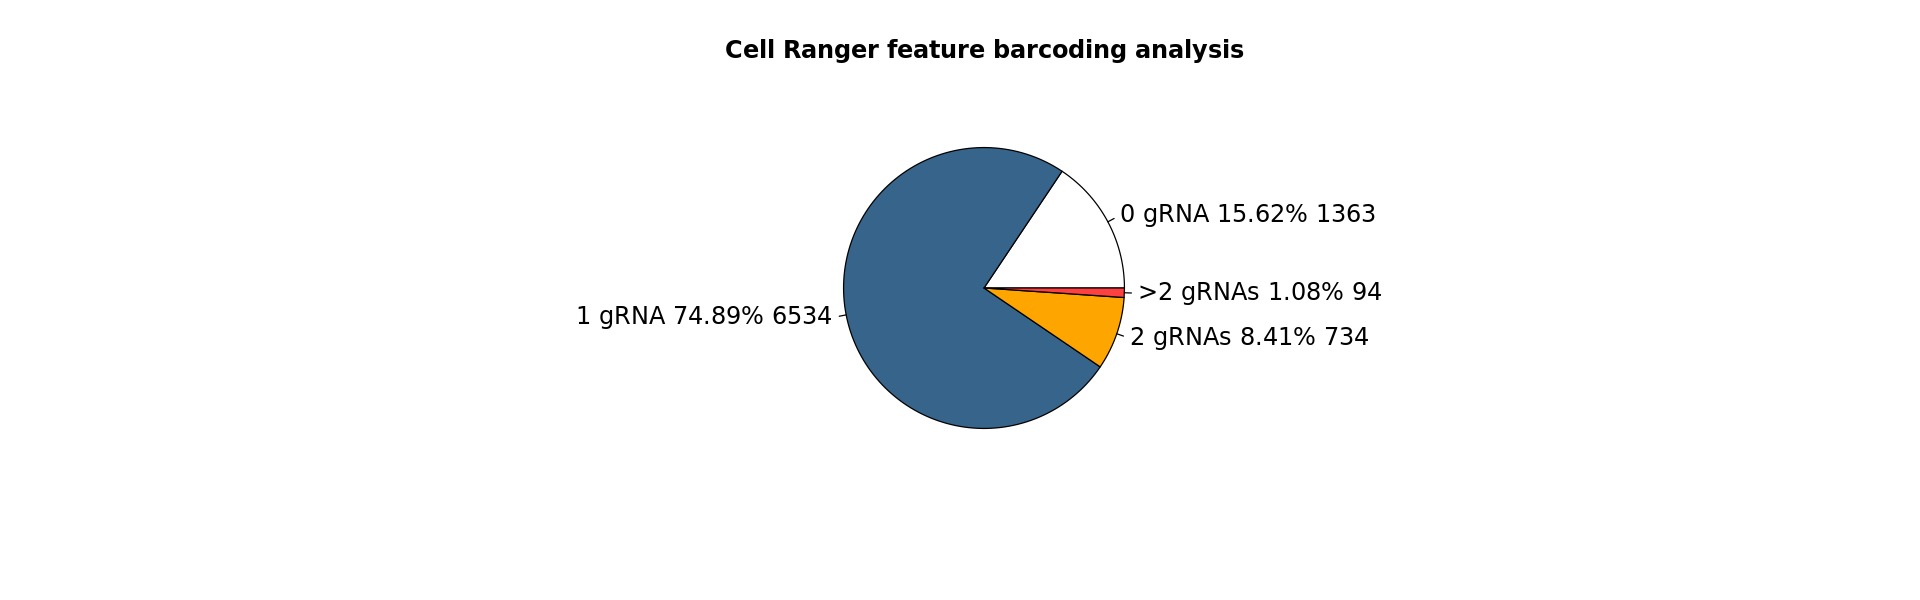

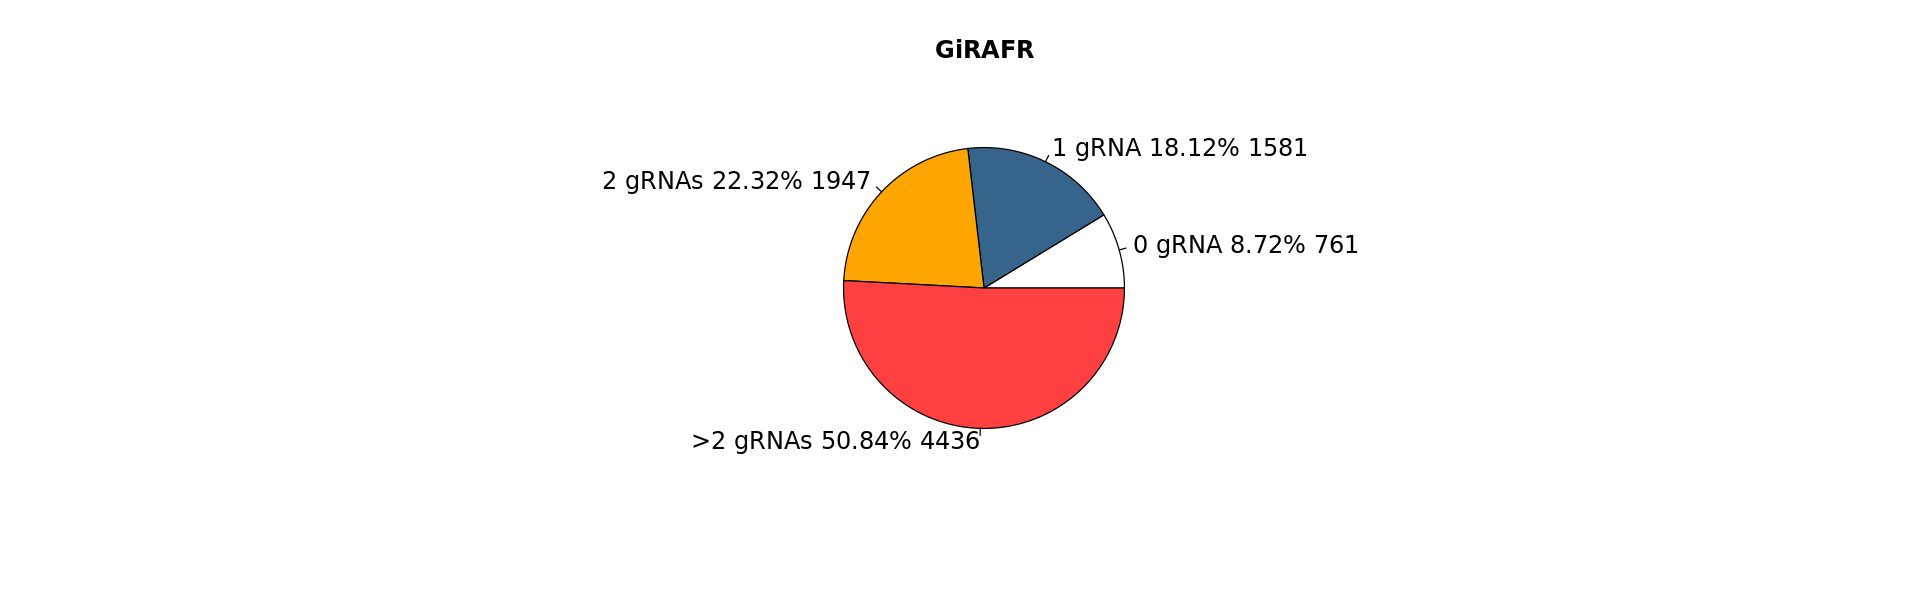

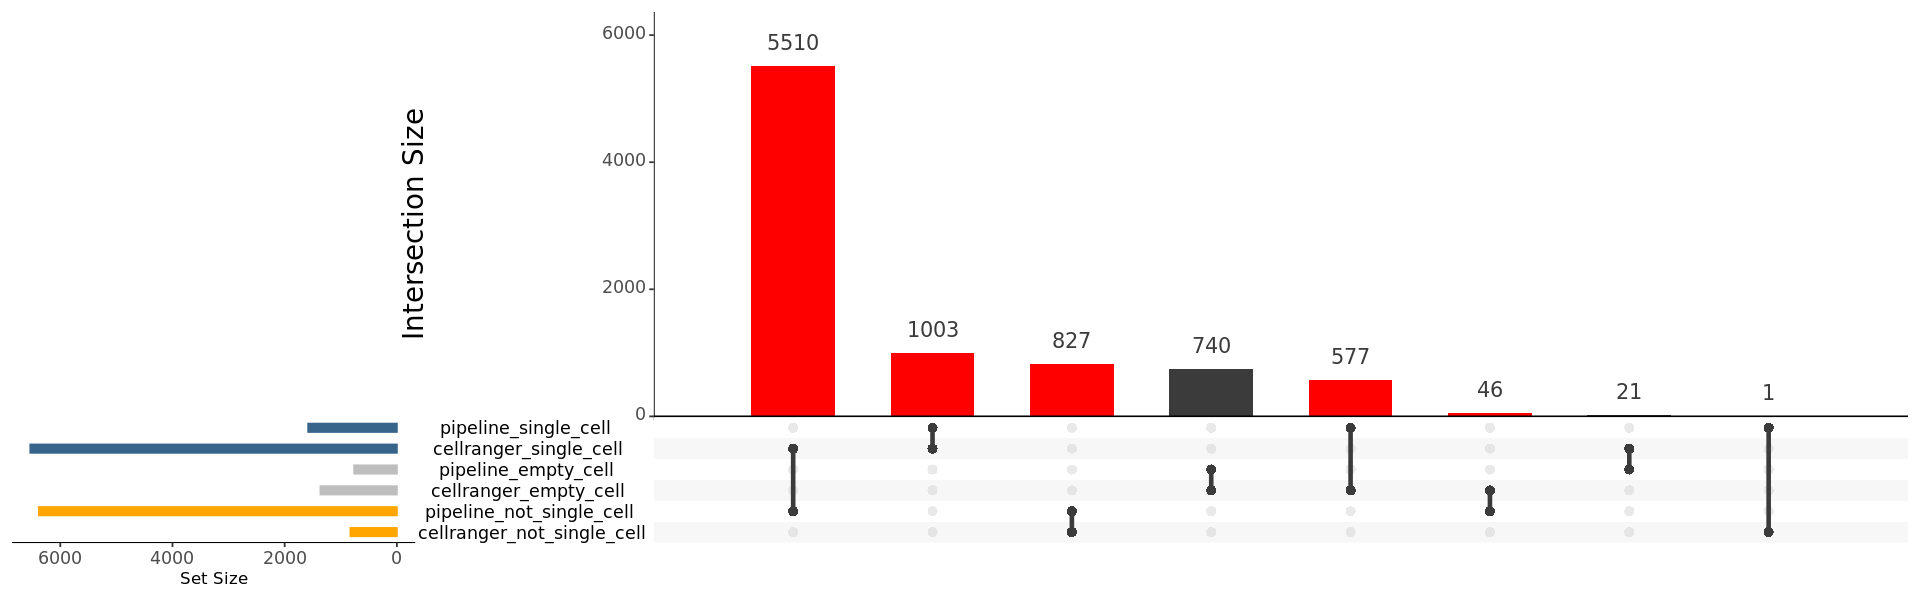

In [18]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Direct_perturb_seq/feature_barcoding_analysis/sgRNAcs1/outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Direct_perturb_seq/feature_barcoding_analysis/sgRNAcs1/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"
compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)


# combine samples MT position

In [114]:
rm(list = ls())

my_colors <- c("D" = 'black', 'I' = 'grey60', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')
input_dir = './GiRAFR_outputs/Replogle_NatureBiotechnology/sample1/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample1 <- read.table(MT_file, header = FALSE)
colnames(MT_sample1) <- c('gene name','structure','structure length', 'position','mutation','variant number')

input_dir = './GiRAFR_outputs/Replogle_NatureBiotechnology/sample2/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample2 <- read.table(MT_file, header = FALSE)
colnames(MT_sample2) <- c('gene name','structure','structure length', 'position','mutation','variant number')

save_pdf <- paste0('./figures_results/Replogle_NatureBiotechnology/', 'Combined.all.MT_position_adjusted.pdf')
pdf(save_pdf, width = 16, height = 5)
options(repr.plot.width = 16, repr.plot.height = 5)
MT2 <- rbind(MT_sample1, MT_sample2)
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20

MT2$position <- factor(MT2$position, levels = seq(-20, 55, by =1))
MT2$mutation2 <- MT2$mutation
MT2$mutation2[grepl('D', MT2$mutation2)] <- 'D' 
MT2$mutation2[grepl('I', MT2$mutation2)] <- 'I'
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

MT2 <- MT2[-which(MT2$position %in% c(-1, -2,0) & MT2$mutation2 %in% c('I','D')),]

ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(aes(y = (..count..)/2))+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')

ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(aes(y = (..count..)/2))+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      axis.title.x=element_blank(),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      plot.title = element_text(size = 18))+
scale_x_discrete(limits = levels(MT2$position))+scale_y_continuous(breaks = c(0,15))
dev.off()

Warning message:
“Removed 31 rows containing non-finite values (stat_count).”
Warning message:
“Removed 31 rows containing non-finite values (stat_count).”


png 
  2

,gene name,structure,structure length,position,mutation,variant number,mutation2
,<chr>,<chr>,<int>,<fct>,<chr>,<chr>,<fct>
1,SRPR_gRNA1_gene,TSO,29,-2,I(1),SRPR_gRNA1_gene_variant_1,I
2,UFM1_gRNA1_gene,TSO,29,-1,I(1),UFM1_gRNA1_gene_variant_1,I
3,NegCtrl2_gRNA1_gene,TSO,29,-2,I(1),NegCtrl2_gRNA1_gene_variant_2,I
5,NegCtrl2_gRNA1_gene,gRNA,21,0,I(2),NegCtrl2_gRNA1_gene_variant_9,I
6,DAD1_gRNA1_gene,TSO,29,-2,I(1),DAD1_gRNA1_gene_variant_1,I
7,TIMM23_gRNA1_gene,TSO,29,-2,I(1),TIMM23_gRNA1_gene_variant_1,I
8,NegCtrl3_gRNA1_gene,TSO,29,-1,I(1),NegCtrl3_gRNA1_gene_variant_1,I
9,TMEM167A_gRNA1_gene,TSO,29,-1,I(1),TMEM167A_gRNA1_gene_variant_1,I
10,EIF2B2_gRNA1_gene,TSO,29,-2,I(1),EIF2B2_gRNA1_gene_variant_1,I


# cell number comparison

In [63]:
exp15 <- Read10X('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Direct_perturb_seq/GSE146194_RAW/GSM4367979_exp1-5')
guide.matrix <- exp15$`CRISPR Guide Capture`

10X data contains more than one type and is being returned as a list containing matrices of each type.



In [64]:
cell_identities.csv <- read.csv('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Direct_perturb_seq/GSE146194_RAW/GSM4367979_exp1-5/GSM4367979_exp1-5.cell_identities.csv')
head(cell_identities.csv)

,cell_barcode,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells
,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<chr>,<dbl>
1,ACAGCTATCGCCGTGA-1,sgIER3IP1,29472,1306,22.56662,1,True,1
2,CCAATCCAGTAACCCT-1,sgMRPL39,25460,1065,23.90610,1,True,1
3,CGAGAAGGTTTACTCT-1,sgSEC61G,24809,1004,24.71016,1,True,2
4,ATCCACCTCAGGCAAG-1,sgCARS,16882,680,24.82647,1,True,1
5,GACTAACCATCTGGTA-1,sgNegCtrl3,16351,681,24.01028,1,True,1
6,AGGCCACAGGGTCGAT-1,sgSEC61A1,15615,602,25.93854,1,True,1


In [65]:
cell_identities.csv$cb <- sapply(strsplit(cell_identities.csv$cell_barcode, '-'),`[`,1)

In [66]:
table(cell_identities.csv$gemgroup)


   1    2    3    4    5 
9583 5732 5736 7075 6280 

gem group 4 is sgRNAcs1

In [67]:
n_col = max(count.fields('../Direct_perturb_seq/sgRNAcs1/cells.gRNA.txt', sep = "\t"))
cells.gRNA <- read.table('../Direct_perturb_seq/sgRNAcs1/cells.gRNA.txt', 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)
                                     
colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))
table(cells.num_features$num_features)


   1    2    3    4    5    6    7    8    9   10   11   13 
1581 1947 2400 1205  432  212  103   46   24    8    4    2 

In [68]:
sum(sub('-4','',cell_identities.csv[which(cell_identities.csv$gemgroup == 4),'cell_barcode']) 
    %in% cells.num_features$cb)


[1] 6943

In [88]:
n_col = max(count.fields('../Direct_perturb_seq/cells.gRNA.txt', sep = "\t"))
cells.gRNA <- read.table('../Direct_perturb_seq/cells.gRNA.txt', 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)
                                     
colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))
table(cells.num_features$num_features)

sum(sub('-5','',cell_identities.csv[which(cell_identities.csv$gemgroup == 5),'cell_barcode']) 
    %in% cells.num_features$cb)



   1    2    3    4    5    6    7    8    9   10 
2047 2738 1275  344  115   47   15    8    1    1 

[1] 5888

gem group 5 is sgRNAcs2

In [69]:
table(cell_identities.csv[which(cell_identities.csv$gemgroup == 1),'number_of_cells'])# ?
table(cell_identities.csv[which(cell_identities.csv$gemgroup == 1),'good_coverage'])
table(cell_identities.csv[which(cell_identities.csv$gemgroup == 2),'number_of_cells'])
table(cell_identities.csv[which(cell_identities.csv$gemgroup == 2),'good_coverage'])
table(cell_identities.csv[which(cell_identities.csv$gemgroup == 3),'number_of_cells'])
table(cell_identities.csv[which(cell_identities.csv$gemgroup == 3),'good_coverage'])
table(cell_identities.csv[which(cell_identities.csv$gemgroup == 4),'number_of_cells'])
table(cell_identities.csv[which(cell_identities.csv$gemgroup == 4),'good_coverage'])


   0    1    2    3    4 
 704 8007  802   66    4 


False  True 
  704  8879 


   1 
5732 


True 
5732 


   1 
5736 


True 
5736 


   1 
7075 


True 
7075 

In [70]:
sgRNAcs1.mix.filtered_barcodes <- read_csv('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Direct_perturb_seq/sgRNAcs1_cellranger/sgRNAcs1/outs/filtered_feature_bc_matrix/barcodes.tsv.gz',col_names = FALSE)
sgRNAcs1.mix.filtered_barcodes$X1 <- sub('-1','',sgRNAcs1.mix.filtered_barcodes$X1)

Rows: 13228 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [71]:
nrow(sgRNAcs1.mix.filtered_barcodes) # mix all runs in sgRNAcs1, here is filtered barcodes
sum(sgRNAcs1.mix.filtered_barcodes$X1 %in% cell_identities.csv$cb) # all in paper metadata

[1] 13228

[1] 7076

In [72]:
sgRNAcs1.mix.maptoguide.cb.uniq <- read.table('../Direct_perturb_seq/sgRNAcs1/cb.uniq.txt')
nrow(sgRNAcs1.mix.maptoguide.cb.uniq) # from mix run alignment, which map to sgRNA, then extract their cb

sum(sgRNAcs1.mix.filtered_barcodes$X1 %in% sgRNAcs1.mix.maptoguide.cb.uniq$V1) # overlap with filtered barcodes

sum(sgRNAcs1.mix.maptoguide.cb.uniq$V1 %in% cell_identities.csv$cb) #!! None are in paper metadata !!

[1] 123233

[1] 5354

[1] 826

In [73]:
sgRNAcs1.feature.filtered_barcodes <- read_csv('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Direct_perturb_seq/feature_barcoding_analysis/sgRNAcs1/outs/filtered_feature_bc_matrix/barcodes.tsv.gz',col_names = FALSE)
sgRNAcs1.feature.filtered_barcodes$X1 <- sub('-1','',sgRNAcs1.feature.filtered_barcodes$X1)

Rows: 8725 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [74]:
nrow(sgRNAcs1.feature.filtered_barcodes) # feature barcoding analysis, gene expression lirbrary filtered barcodes
sum(sgRNAcs1.feature.filtered_barcodes$X1 %in% cell_identities.csv$cb) # all in paper metadata

[1] 8725

[1] 7073

In [75]:
sgRNAcs1.crispr.filtered_barcodes <- read_csv('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Direct_perturb_seq/sgRNAcs1_cellranger/sgRNAcs1_SRR11214035_SRR11214036/outs/filtered_feature_bc_matrix/barcodes.tsv.gz',col_names = FALSE)
sgRNAcs1.crispr.filtered_barcodes$X1 <- sub('-1','',sgRNAcs1.crispr.filtered_barcodes$X1) # seperatly two runs (amplified sgRNA library) 

Rows: 4833 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [76]:
nrow(sgRNAcs1.crispr.filtered_barcodes)
sum(sgRNAcs1.crispr.filtered_barcodes$X1 %in% cell_identities.csv$cb) # almost none in paper metadata
sum(sgRNAcs1.crispr.filtered_barcodes$X1 %in% sgRNAcs1.mix.filtered_barcodes$X1) # same barcodes as mix all run alignment
sum(sgRNAcs1.crispr.filtered_barcodes$X1 %in% sgRNAcs1.feature.filtered_barcodes$X1) # all different

[1] 4833

[1] 2

[1] 4461

[1] 3

In [77]:
cell_identities.csv[which(cell_identities.csv$cb == 'TCATTTGGTAGAGACC'),]

'TCATTTGGTAGAGACC' %in% sgRNAcs1.mix.filtered_barcodes$X1
'TCATTTGGTAGAGACC' %in% sgRNAcs1.feature.filtered_barcodes$X1
'TCATTTGGTAGAGACC' %in% sgRNAcs1.crispr.filtered_barcodes$X1
'TCATTTGGTAGAGACC' %in% sgRNAcs1.mix.maptoguide.cb.uniq$X1

,cell_barcode,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells,cb
,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<chr>,<dbl>,<chr>
25082,TCATTTGGTAGAGACC-4,sgATP5B,2160,642,3.364486,4,True,1,TCATTTGGTAGAGACC


[1] TRUE

[1] TRUE

[1] FALSE

[1] FALSE

In [78]:
sum(sgRNAcs1.mix.filtered_barcodes$X1 %in% sgRNAcs1.feature.filtered_barcodes$X1)
sum(sgRNAcs1.mix.filtered_barcodes$X1 %in% sgRNAcs1.crispr.filtered_barcodes$X1)
sum(sgRNAcs1.mix.filtered_barcodes$X1 %in% cell_identities.csv$cb)

[1] 8725

[1] 4461

[1] 7076

In [79]:
sum(sgRNAcs1.crispr.filtered_barcodes$X1 %in% cell_identities.csv$cb)

[1] 2